**Create a Dataframe with 3 columns: Name of speaker, Date of speech and Speech**

by reading the data from all the files

In [74]:
import os
import numpy as np
import pandas as pd
import re
import spacy
nlp = spacy.load("en_core_web_sm")
from spacy import displacy
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.text import Text
import string, re
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# reading the data
path = r'C:\Users\solharsh\Desktop\Capstone NLP\NLP Assignment RAW\Text'
files = os.listdir(path)
files

['201002 PM.txt',
 '201102 PM.txt',
 '201203 PM.txt',
 '201302 PC.txt',
 '201402 PC Int.txt',
 '201407 AJ.txt',
 '201502 AJ.txt',
 '201602 AJ.txt',
 '201702 AJ.txt',
 '201802 AJ.txt',
 '201902 PG Int.txt',
 '201907 NS.txt']

These are the files that are present in the Text folder. Lets read all the data in these files and keep it in an object

In [6]:
all_speech = []
for file in files:
    file_full_path = os.path.join(path, file)
    with open(file_full_path, encoding="ANSI") as f:
        all_speech.append(f.read().strip())

In [7]:
print('We have the data for {} files'.format(len(all_speech)))

We have the data for 12 files


In [8]:
# checking on eof the files data
print(all_speech[0])
len(all_speech[0])

Budget  2010-2011

 

Speech  of

Pranab Mukherjee

Minister of Finance

 

February  26,  2010

 

Madam Speaker,

            I rise to present the Union Budget for 2010-11.

            In 2009, when I presented the interim Budget in February and the regular Budget in July in this august House, the Indian economy was facing grave uncertainties. Growth had started decelerating and the business sentiment was weak. The economy's capacity to sustain high growth was under serious threat from the widespread economic slowdown in the developed world.

2.          It was not clear to us, as also to the policy makers in many other countries, how this crisis would eventually unfold. What would be its impact on the growth momentum of the Indian economy?  How soon will we be able to turnaround the fortunes of our economy? The short term global outlook was bleak and the consensus was that year 2009 would face the brunt of this crisis across the world.

3.          At home, there was added uncerta

 Link: https://www.indiabudget.gov.in/budget_archive/ub2010-11/bs/speecha.htm


79370

## Getting names of Speakers

In [9]:
pattern = r'Speech\s*of\s*(.*\s.*)\s*Minister'
found = re.findall(pattern, ' '.join(all_speech))
speakers = [f.replace('\n', '').strip() for f in found]
print(*speakers, len(speakers), sep='\n')

Pranab Mukherjee
Pranab Mukherjee
Pranab Mukherjee
P. Chidambaram
P. Chidambaram
Arun Jaitley
Arun Jaitley
Arun Jaitley
Arun Jaitley
Arun Jaitley
Piyush Goyal
Nirmala Sitharaman
12


## Getting all the speech dates

In [10]:
speech_dates = []
pattern = r'[A-Z]\w+\s*\d{1,2}\s*,\s*\d{4}'
for speech in all_speech:
    found = re.search(pattern, speech)
    if found:
        speech_date = speech[found.start():found.end()].replace('\n','').strip()
        speech_dates.append(speech_date)
print(*speech_dates, len(speech_dates), sep='\n')

February  26,  2010
February 28, 2011
March 16, 2012
February 28, 2013
February 17, 2014
July 10, 2014
February 28, 2015
February 29, 2016
February 1, 2017
February 1, 2018
February 1, 2019
July 5, 2019
12


In [11]:
#cleaned = []
#for i in len(all_speech):
    #pattern_ = all_speech[i][all_speech[i].find('present'):]
    #cleaned.append(pattern_)

## Creating a DataFrame from speaker names, dates and corresponding speeches

In [12]:
rawData = pd.DataFrame({'Speaker_Name':speakers,'Date_Of_Speech':speech_dates,'Speech':all_speech})
rawData

,Speaker_Name,Date_Of_Speech,Speech
0,Pranab Mukherjee,"February 26, 2010",Budget 2010-2011\n\n \n\nSpeech of\n\nPranab...
1,Pranab Mukherjee,"February 28, 2011",Budget 2011-2012 \n\nSpeech of \n\nPranab Mukh...
2,Pranab Mukherjee,"March 16, 2012",Budget 2012-2013 \n\nSpeech of \n\nPranab Mukh...
3,P. Chidambaram,"February 28, 2013",Budget 2013-2014 \n\nSpeech of \n\nP. Chidamba...
4,P. Chidambaram,"February 17, 2014",Interim Budget 2014-2015 \n\nSpeech of \n\nP. ...
5,Arun Jaitley,"July 10, 2014",Budget 2014-2015 \n\nSpeech of \n\nArun Jaitle...
6,Arun Jaitley,"February 28, 2015",CONTENTS \n\nPART -A \n\nPage No. \nIntroducti...
7,Arun Jaitley,"February 29, 2016",CONTENTS \n\nPART -A \n\nPage No. \n\nIntroduc...
8,Arun Jaitley,"February 1, 2017",CONTENTS \n\n \n\nPART - A \n\n Page No. \n\n ...
9,Arun Jaitley,"February 1, 2018",Budget 2018-2019 \n\n \n\nSpeech of \n\nArun J...


### Removing everything before "I rise to present" as it is common in all files and the speech begins after it.

In [13]:
first = rawData['Speech'][0][rawData['Speech'][0].find('present'):]
second = rawData['Speech'][1][rawData['Speech'][1].find('present'):]
third = rawData['Speech'][2][rawData['Speech'][2].find('present'):]
fourth = rawData['Speech'][3][rawData['Speech'][3].find('present'):]
fifth = rawData['Speech'][4][rawData['Speech'][4].find('present'):]
sixth = rawData['Speech'][5][rawData['Speech'][5].find('present'):]
seventh = rawData['Speech'][6][rawData['Speech'][6].find('present'):]
eighth = rawData['Speech'][7][rawData['Speech'][7].find('present'):]
ninth = rawData['Speech'][8][rawData['Speech'][8].find('present'):]
tenth = rawData['Speech'][9][rawData['Speech'][9].find('present'):]
eleventh = rawData['Speech'][10][rawData['Speech'][10].find('present'):]
twelth = rawData['Speech'][11][rawData['Speech'][11].find('present'):]
rawData['Speech'].iat[0] = first
rawData['Speech'].iat[1] = second
rawData['Speech'].iat[2] = third
rawData['Speech'].iat[3] = fourth
rawData['Speech'].iat[4] = fifth
rawData['Speech'].iat[5] = sixth
rawData['Speech'].iat[6] = seventh
rawData['Speech'].iat[7] = eighth
rawData['Speech'].iat[8] = ninth
rawData['Speech'].iat[9] = tenth
rawData['Speech'].iat[10] = eleventh
rawData['Speech'].iat[11] = twelth
rawData

,Speaker_Name,Date_Of_Speech,Speech
0,Pranab Mukherjee,"February 26, 2010",present the Union Budget for 2010-11.\n\n ...
1,Pranab Mukherjee,"February 28, 2011",present the Union Budget for 2011-12. \n\nWe a...
2,Pranab Mukherjee,"March 16, 2012",present the Union Budget for 2012-13. \n\nFor ...
3,P. Chidambaram,"February 28, 2013",present the Budget for the year 2013-14. \n\n2...
4,P. Chidambaram,"February 17, 2014",present the Interim Budget for 2014-15. \n\nTh...
5,Arun Jaitley,"July 10, 2014",present the Budget for the year 2014-15. \n\nI...
6,Arun Jaitley,"February 28, 2015",present the Budget of the Union for the year 2...
7,Arun Jaitley,"February 29, 2016",present the Budget for the year 2016-17. \n\n2...
8,Arun Jaitley,"February 1, 2017",present the Budget \nfor 2017-18. Spring is a ...
9,Arun Jaitley,"February 1, 2018","present the Budget for 2018-19. \n2. Madam, fo..."


# Explore the dataset

In [14]:
#shape of dataset

In [15]:
print("Input data has {} rows and {} columns".format(len(rawData), len(rawData.columns)))

Input data has 12 rows and 3 columns


In [16]:
# how much missing data is there?

In [17]:
print("Number of Nulls in the Speeches: {}".format(rawData['Speech'].isnull().sum()))

Number of Nulls in the Speeches: 0


In [18]:
len(rawData['Speech'])

12

In [103]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\solharsh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Remove punctuation

In [29]:
rawData['Speech_Experiment'] = rawData['Speech']
rawData.head()

,Speaker_Name,Date_Of_Speech,Speech,Speech_Clean,Speech_Cleaner,Speech_Clean_EngOnly,Speech_Experiment
0,Pranab Mukherjee,"February 26, 2010",present the Union Budget for 2010-11.\n\n ...,present the Union Budget for 201011\n\n ...,present the Union Budget for 201011\n\n ...,present the Union Budget for 201011 In 2009 wh...,present the Union Budget for 2010-11.\n\n ...
1,Pranab Mukherjee,"February 28, 2011",present the Union Budget for 2011-12. \n\nWe a...,present the Union Budget for 201112 \n\nWe are...,present the Union Budget for 201112 \n\nWe are...,present the Union Budget for 201112 We are rea...,present the Union Budget for 2011-12. \n\nWe a...
2,Pranab Mukherjee,"March 16, 2012",present the Union Budget for 2012-13. \n\nFor ...,present the Union Budget for 201213 \n\nFor th...,present the Union Budget for 201213 \n\nFor th...,present the Union Budget for 201213 For the ec...,present the Union Budget for 2012-13. \n\nFor ...
3,P. Chidambaram,"February 28, 2013",present the Budget for the year 2013-14. \n\n2...,present the Budget for the year 201314 \n\n2 I...,present the Budget for the year 201314 \n\n2 I...,present the Budget for the year 201314 2 I rec...,present the Budget for the year 2013-14. \n\n2...
4,P. Chidambaram,"February 17, 2014",present the Interim Budget for 2014-15. \n\nTh...,present the Interim Budget for 201415 \n\nThe ...,present the Interim Budget for 201415 \n\nThe ...,present the Interim Budget for 201415 The Curr...,present the Interim Budget for 2014-15. \n\nTh...


### Figuring out how much percentage of the speech is punctuations

In [48]:
import string
string.punctuation

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

rawData['Speech_len'] = rawData['Speech_Experiment'].apply(lambda x: len(x) - x.count(" "))
rawData['Speech_punct%'] = rawData['Speech_Experiment'].apply(lambda x: count_punct(x))
rawData

,Speaker_Name,Date_Of_Speech,Speech,Speech_Clean,Speech_Cleaner,Speech_Clean_EngOnly,Speech_Experiment,Speech_len,Speech_punct%,Speech_ACR_len,Speech_ACR%
0,Pranab Mukherjee,"February 26, 2010",present the Union Budget for 2010-11.\n\n ...,present the Union Budget for 201011\n\n ...,present the Union Budget for 201011\n\n ...,present the Union Budget for 201011 In 2009 wh...,present the Union Budget for 2010-11.\n\n ...,65386,2.6,65386,2.6
1,Pranab Mukherjee,"February 28, 2011",present the Union Budget for 2011-12. \n\nWe a...,present the Union Budget for 201112 \n\nWe are...,present the Union Budget for 201112 \n\nWe are...,present the Union Budget for 201112 We are rea...,present the Union Budget for 2011-12. \n\nWe a...,73724,2.9,73724,2.9
2,Pranab Mukherjee,"March 16, 2012",present the Union Budget for 2012-13. \n\nFor ...,present the Union Budget for 201213 \n\nFor th...,present the Union Budget for 201213 \n\nFor th...,present the Union Budget for 201213 For the ec...,present the Union Budget for 2012-13. \n\nFor ...,74782,3.1,74782,3.1
3,P. Chidambaram,"February 28, 2013",present the Budget for the year 2013-14. \n\n2...,present the Budget for the year 201314 \n\n2 I...,present the Budget for the year 201314 \n\n2 I...,present the Budget for the year 201314 2 I rec...,present the Budget for the year 2013-14. \n\n2...,65245,3.1,65245,3.1
4,P. Chidambaram,"February 17, 2014",present the Interim Budget for 2014-15. \n\nTh...,present the Interim Budget for 201415 \n\nThe ...,present the Interim Budget for 201415 \n\nThe ...,present the Interim Budget for 201415 The Curr...,present the Interim Budget for 2014-15. \n\nTh...,33976,3.4,33976,3.4
5,Arun Jaitley,"July 10, 2014",present the Budget for the year 2014-15. \n\nI...,present the Budget for the year 201415 \n\nI S...,present the Budget for the year 201415 \n\nI ...,present the Budget for the year 201415 I 2 The...,present the Budget for the year 2014-15. \n\nI...,86601,2.4,86601,2.4
6,Arun Jaitley,"February 28, 2015",present the Budget of the Union for the year 2...,present the Budget of the Union for the year 2...,present the Budget of the Union for the year 2...,present the Budget of the Union for the year 2...,present the Budget of the Union for the year 2...,93507,3.3,93507,3.3
7,Arun Jaitley,"February 29, 2016",present the Budget for the year 2016-17. \n\n2...,present the Budget for the year 201617 \n\n2 I...,present the Budget for the year 201617 \n\n2 I...,present the Budget for the year 201617 2 I am ...,present the Budget for the year 2016-17. \n\n2...,130710,3.3,130710,3.3
8,Arun Jaitley,"February 1, 2017",present the Budget \nfor 2017-18. Spring is a ...,present the Budget \nfor 201718 Spring is a se...,present the Budget \nfor 201718 Spring is a se...,present the Budget for 201718 Spring is a seas...,present the Budget \nfor 2017-18. Spring is a ...,99901,3.0,99901,3.0
9,Arun Jaitley,"February 1, 2018","present the Budget for 2018-19. \n2. Madam, fo...",present the Budget for 201819 \n2 Madam four y...,present the Budget for 201819 \n2 Madam four y...,present the Budget for 201819 2 Madam four ago...,"present the Budget for 2018-19. \n2. Madam, fo...",100216,3.1,100216,3.1


### Removing Puntuations

In [54]:
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

rawData['Speech_Clean'] = rawData['Speech'].apply(lambda x: remove_punct(x))

rawData.head()

,Speaker_Name,Date_Of_Speech,Speech,Speech_Clean,Speech_Cleaner,Speech_Clean_EngOnly,Speech_Experiment,Speech_len,Speech_punct%,Speech_ACR_len,Speech_ACR%
0,Pranab Mukherjee,"February 26, 2010",present the Union Budget for 2010-11.\n\n ...,present the Union Budget for 201011\n\n ...,present the Union Budget for 201011\n\n ...,present the Union Budget for 201011 In 2009 wh...,present the Union Budget for 2010-11.\n\n ...,65386,2.6,65386,2.6
1,Pranab Mukherjee,"February 28, 2011",present the Union Budget for 2011-12. \n\nWe a...,present the Union Budget for 201112 \n\nWe are...,present the Union Budget for 201112 \n\nWe are...,present the Union Budget for 201112 We are rea...,present the Union Budget for 2011-12. \n\nWe a...,73724,2.9,73724,2.9
2,Pranab Mukherjee,"March 16, 2012",present the Union Budget for 2012-13. \n\nFor ...,present the Union Budget for 201213 \n\nFor th...,present the Union Budget for 201213 \n\nFor th...,present the Union Budget for 201213 For the ec...,present the Union Budget for 2012-13. \n\nFor ...,74782,3.1,74782,3.1
3,P. Chidambaram,"February 28, 2013",present the Budget for the year 2013-14. \n\n2...,present the Budget for the year 201314 \n\n2 I...,present the Budget for the year 201314 \n\n2 I...,present the Budget for the year 201314 2 I rec...,present the Budget for the year 2013-14. \n\n2...,65245,3.1,65245,3.1
4,P. Chidambaram,"February 17, 2014",present the Interim Budget for 2014-15. \n\nTh...,present the Interim Budget for 201415 \n\nThe ...,present the Interim Budget for 201415 \n\nThe ...,present the Interim Budget for 201415 The Curr...,present the Interim Budget for 2014-15. \n\nTh...,33976,3.4,33976,3.4


### Removing Accronyms like (NCEF, NGRBA, RBI and so on)

In [55]:
import re
def remove_ACR(text):
    text_noACR = re.sub(r"\b[A-Z]{2,}\b", "", text)
    return text_noACR

rawData['Speech_Cleaner'] =rawData['Speech_Clean'].apply(lambda x: remove_ACR(x))
rawData.head()

,Speaker_Name,Date_Of_Speech,Speech,Speech_Clean,Speech_Cleaner,Speech_Clean_EngOnly,Speech_Experiment,Speech_len,Speech_punct%,Speech_ACR_len,Speech_ACR%
0,Pranab Mukherjee,"February 26, 2010",present the Union Budget for 2010-11.\n\n ...,present the Union Budget for 201011\n\n ...,present the Union Budget for 201011\n\n ...,present the Union Budget for 201011 In 2009 wh...,present the Union Budget for 2010-11.\n\n ...,65386,2.6,65386,2.6
1,Pranab Mukherjee,"February 28, 2011",present the Union Budget for 2011-12. \n\nWe a...,present the Union Budget for 201112 \n\nWe are...,present the Union Budget for 201112 \n\nWe are...,present the Union Budget for 201112 We are rea...,present the Union Budget for 2011-12. \n\nWe a...,73724,2.9,73724,2.9
2,Pranab Mukherjee,"March 16, 2012",present the Union Budget for 2012-13. \n\nFor ...,present the Union Budget for 201213 \n\nFor th...,present the Union Budget for 201213 \n\nFor th...,present the Union Budget for 201213 For the ec...,present the Union Budget for 2012-13. \n\nFor ...,74782,3.1,74782,3.1
3,P. Chidambaram,"February 28, 2013",present the Budget for the year 2013-14. \n\n2...,present the Budget for the year 201314 \n\n2 I...,present the Budget for the year 201314 \n\n2 I...,present the Budget for the year 201314 2 I rec...,present the Budget for the year 2013-14. \n\n2...,65245,3.1,65245,3.1
4,P. Chidambaram,"February 17, 2014",present the Interim Budget for 2014-15. \n\nTh...,present the Interim Budget for 201415 \n\nThe ...,present the Interim Budget for 201415 \n\nThe ...,present the Interim Budget for 201415 The Curr...,present the Interim Budget for 2014-15. \n\nTh...,33976,3.4,33976,3.4


### Removing Non-English Words

In [56]:
import nltk 
nltk.download('words')
words = set(nltk.corpus.words.words())
def remove_noneng(text):
    text_noeng = " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())
    return text_noeng

rawData['Speech_Clean_EngOnly'] =rawData['Speech_Cleaner'].apply(lambda x: remove_noneng(x))
rawData['Speech_Clean_EngOnly'][0]

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\solharsh\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


'present the Union Budget for 201011 In 2009 when I the interim Budget in and the regular Budget in in this august House the economy was facing grave Growth had and the business sentiment was weak The capacity to sustain high growth was under serious threat from the widespread economic slowdown in the world 2 It was not clear to us as also to the policy in many other how this crisis would eventually unfold What would be its impact on the growth momentum of the economy How soon will we be able to turnaround the of our economy The short term global outlook was bleak and the consensus was that year 2009 would face the brunt of this crisis across the world 3 At home there was added uncertainty on account of the and subnormal southwest monsoon which had the crop in the country There were about production and of food and its possible on the growth of rural demand 4 Today as I stand before you I can say with confidence that we have weathered these crises well economy now is in a far better po

### Tokenization

In [58]:
import re

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

rawData['Speech_Tokenize'] = rawData['Speech_Clean_EngOnly'].apply(lambda x: tokenize(x.lower()))
rawData.head()

,Speaker_Name,Date_Of_Speech,Speech,Speech_Clean,Speech_Cleaner,Speech_Clean_EngOnly,Speech_Experiment,Speech_len,Speech_punct%,Speech_ACR_len,Speech_ACR%,Speech_Tokenize
0,Pranab Mukherjee,"February 26, 2010",present the Union Budget for 2010-11.\n\n ...,present the Union Budget for 201011\n\n ...,present the Union Budget for 201011\n\n ...,present the Union Budget for 201011 In 2009 wh...,present the Union Budget for 2010-11.\n\n ...,65386,2.6,65386,2.6,"[present, the, union, budget, for, 201011, in,..."
1,Pranab Mukherjee,"February 28, 2011",present the Union Budget for 2011-12. \n\nWe a...,present the Union Budget for 201112 \n\nWe are...,present the Union Budget for 201112 \n\nWe are...,present the Union Budget for 201112 We are rea...,present the Union Budget for 2011-12. \n\nWe a...,73724,2.9,73724,2.9,"[present, the, union, budget, for, 201112, we,..."
2,Pranab Mukherjee,"March 16, 2012",present the Union Budget for 2012-13. \n\nFor ...,present the Union Budget for 201213 \n\nFor th...,present the Union Budget for 201213 \n\nFor th...,present the Union Budget for 201213 For the ec...,present the Union Budget for 2012-13. \n\nFor ...,74782,3.1,74782,3.1,"[present, the, union, budget, for, 201213, for..."
3,P. Chidambaram,"February 28, 2013",present the Budget for the year 2013-14. \n\n2...,present the Budget for the year 201314 \n\n2 I...,present the Budget for the year 201314 \n\n2 I...,present the Budget for the year 201314 2 I rec...,present the Budget for the year 2013-14. \n\n2...,65245,3.1,65245,3.1,"[present, the, budget, for, the, year, 201314,..."
4,P. Chidambaram,"February 17, 2014",present the Interim Budget for 2014-15. \n\nTh...,present the Interim Budget for 201415 \n\nThe ...,present the Interim Budget for 201415 \n\nThe ...,present the Interim Budget for 201415 The Curr...,present the Interim Budget for 2014-15. \n\nTh...,33976,3.4,33976,3.4,"[present, the, interim, budget, for, 201415, t..."


In [59]:
stopword = nltk.corpus.stopwords.words('english')

In [174]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text
rawData.drop(['Speech_Tokenize'], axis=1)

rawData['Speech_Nostop'] = rawData['Speech_Tokenize'].apply(lambda x: remove_stopwords(x))

rawData.head()

,Speaker_Name,Date_Of_Speech,Speech,Speech_Clean,Speech_Cleaner,Speech_Clean_EngOnly,Speech_Experiment,Speech_len,Speech_punct%,Speech_ACR_len,Speech_ACR%,Speech_Tokenize,Speech_Nostop,Speech_Stemmed,Speech_Lemmatized
0,Pranab Mukherjee,"February 26, 2010",present the Union Budget for 2010-11.\n\n ...,present the Union Budget for 201011\n\n ...,present the Union Budget for 201011\n\n ...,present the Union Budget for 201011 In 2009 wh...,present the Union Budget for 2010-11.\n\n ...,65386,2.6,65386,2.6,"[present, the, union, budget, for, 201011, in,...","[present, union, budget, 201011, 2009, interim...","[present, union, budget, 201011, 2009, interim...",<function is_digit at 0x0000022E21411DC8>
1,Pranab Mukherjee,"February 28, 2011",present the Union Budget for 2011-12. \n\nWe a...,present the Union Budget for 201112 \n\nWe are...,present the Union Budget for 201112 \n\nWe are...,present the Union Budget for 201112 We are rea...,present the Union Budget for 2011-12. \n\nWe a...,73724,2.9,73724,2.9,"[present, the, union, budget, for, 201112, we,...","[present, union, budget, 201112, reaching, end...","[present, union, budget, 201112, reach, end, r...",<function is_digit at 0x0000022E21411DC8>
2,Pranab Mukherjee,"March 16, 2012",present the Union Budget for 2012-13. \n\nFor ...,present the Union Budget for 201213 \n\nFor th...,present the Union Budget for 201213 \n\nFor th...,present the Union Budget for 201213 For the ec...,present the Union Budget for 2012-13. \n\nFor ...,74782,3.1,74782,3.1,"[present, the, union, budget, for, 201213, for...","[present, union, budget, 201213, economy, year...","[present, union, budget, 201213, economi, year...",<function is_digit at 0x0000022E21411DC8>
3,P. Chidambaram,"February 28, 2013",present the Budget for the year 2013-14. \n\n2...,present the Budget for the year 201314 \n\n2 I...,present the Budget for the year 201314 \n\n2 I...,present the Budget for the year 201314 2 I rec...,present the Budget for the year 2013-14. \n\n2...,65245,3.1,65245,3.1,"[present, the, budget, for, the, year, 201314,...","[present, budget, year, 201314, 2, recall, las...","[present, budget, year, 201314, 2, recal, last...",<function is_digit at 0x0000022E21411DC8>
4,P. Chidambaram,"February 17, 2014",present the Interim Budget for 2014-15. \n\nTh...,present the Interim Budget for 201415 \n\nThe ...,present the Interim Budget for 201415 \n\nThe ...,present the Interim Budget for 201415 The Curr...,present the Interim Budget for 2014-15. \n\nTh...,33976,3.4,33976,3.4,"[present, the, interim, budget, for, 201415, t...","[present, interim, budget, 201415, current, ec...","[present, interim, budget, 201415, current, ec...",<function is_digit at 0x0000022E21411DC8>


In [62]:
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()

### Stem text

In [63]:
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

rawData['Speech_Stemmed'] = rawData['Speech_Nostop'].apply(lambda x: stemming(x))

rawData.head()

,Speaker_Name,Date_Of_Speech,Speech,Speech_Clean,Speech_Cleaner,Speech_Clean_EngOnly,Speech_Experiment,Speech_len,Speech_punct%,Speech_ACR_len,Speech_ACR%,Speech_Tokenize,Speech_Nostop,Speech_Stemmed
0,Pranab Mukherjee,"February 26, 2010",present the Union Budget for 2010-11.\n\n ...,present the Union Budget for 201011\n\n ...,present the Union Budget for 201011\n\n ...,present the Union Budget for 201011 In 2009 wh...,present the Union Budget for 2010-11.\n\n ...,65386,2.6,65386,2.6,"[present, the, union, budget, for, 201011, in,...","[present, union, budget, 201011, 2009, interim...","[present, union, budget, 201011, 2009, interim..."
1,Pranab Mukherjee,"February 28, 2011",present the Union Budget for 2011-12. \n\nWe a...,present the Union Budget for 201112 \n\nWe are...,present the Union Budget for 201112 \n\nWe are...,present the Union Budget for 201112 We are rea...,present the Union Budget for 2011-12. \n\nWe a...,73724,2.9,73724,2.9,"[present, the, union, budget, for, 201112, we,...","[present, union, budget, 201112, reaching, end...","[present, union, budget, 201112, reach, end, r..."
2,Pranab Mukherjee,"March 16, 2012",present the Union Budget for 2012-13. \n\nFor ...,present the Union Budget for 201213 \n\nFor th...,present the Union Budget for 201213 \n\nFor th...,present the Union Budget for 201213 For the ec...,present the Union Budget for 2012-13. \n\nFor ...,74782,3.1,74782,3.1,"[present, the, union, budget, for, 201213, for...","[present, union, budget, 201213, economy, year...","[present, union, budget, 201213, economi, year..."
3,P. Chidambaram,"February 28, 2013",present the Budget for the year 2013-14. \n\n2...,present the Budget for the year 201314 \n\n2 I...,present the Budget for the year 201314 \n\n2 I...,present the Budget for the year 201314 2 I rec...,present the Budget for the year 2013-14. \n\n2...,65245,3.1,65245,3.1,"[present, the, budget, for, the, year, 201314,...","[present, budget, year, 201314, 2, recall, las...","[present, budget, year, 201314, 2, recal, last..."
4,P. Chidambaram,"February 17, 2014",present the Interim Budget for 2014-15. \n\nTh...,present the Interim Budget for 201415 \n\nThe ...,present the Interim Budget for 201415 \n\nThe ...,present the Interim Budget for 201415 The Curr...,present the Interim Budget for 2014-15. \n\nTh...,33976,3.4,33976,3.4,"[present, the, interim, budget, for, 201415, t...","[present, interim, budget, 201415, current, ec...","[present, interim, budget, 201415, current, ec..."


In [64]:
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

rawData['Speech_Lemmatized'] = rawData['Speech_Stemmed'].apply(lambda x: lemmatizing(x))

rawData.head(10)

,Speaker_Name,Date_Of_Speech,Speech,Speech_Clean,Speech_Cleaner,Speech_Clean_EngOnly,Speech_Experiment,Speech_len,Speech_punct%,Speech_ACR_len,Speech_ACR%,Speech_Tokenize,Speech_Nostop,Speech_Stemmed,Speech_Lemmatized
0,Pranab Mukherjee,"February 26, 2010",present the Union Budget for 2010-11.\n\n ...,present the Union Budget for 201011\n\n ...,present the Union Budget for 201011\n\n ...,present the Union Budget for 201011 In 2009 wh...,present the Union Budget for 2010-11.\n\n ...,65386,2.6,65386,2.6,"[present, the, union, budget, for, 201011, in,...","[present, union, budget, 201011, 2009, interim...","[present, union, budget, 201011, 2009, interim...","[present, union, budget, 201011, 2009, interim..."
1,Pranab Mukherjee,"February 28, 2011",present the Union Budget for 2011-12. \n\nWe a...,present the Union Budget for 201112 \n\nWe are...,present the Union Budget for 201112 \n\nWe are...,present the Union Budget for 201112 We are rea...,present the Union Budget for 2011-12. \n\nWe a...,73724,2.9,73724,2.9,"[present, the, union, budget, for, 201112, we,...","[present, union, budget, 201112, reaching, end...","[present, union, budget, 201112, reach, end, r...","[present, union, budget, 201112, reach, end, r..."
2,Pranab Mukherjee,"March 16, 2012",present the Union Budget for 2012-13. \n\nFor ...,present the Union Budget for 201213 \n\nFor th...,present the Union Budget for 201213 \n\nFor th...,present the Union Budget for 201213 For the ec...,present the Union Budget for 2012-13. \n\nFor ...,74782,3.1,74782,3.1,"[present, the, union, budget, for, 201213, for...","[present, union, budget, 201213, economy, year...","[present, union, budget, 201213, economi, year...","[present, union, budget, 201213, economi, year..."
3,P. Chidambaram,"February 28, 2013",present the Budget for the year 2013-14. \n\n2...,present the Budget for the year 201314 \n\n2 I...,present the Budget for the year 201314 \n\n2 I...,present the Budget for the year 201314 2 I rec...,present the Budget for the year 2013-14. \n\n2...,65245,3.1,65245,3.1,"[present, the, budget, for, the, year, 201314,...","[present, budget, year, 201314, 2, recall, las...","[present, budget, year, 201314, 2, recal, last...","[present, budget, year, 201314, 2, recal, last..."
4,P. Chidambaram,"February 17, 2014",present the Interim Budget for 2014-15. \n\nTh...,present the Interim Budget for 201415 \n\nThe ...,present the Interim Budget for 201415 \n\nThe ...,present the Interim Budget for 201415 The Curr...,present the Interim Budget for 2014-15. \n\nTh...,33976,3.4,33976,3.4,"[present, the, interim, budget, for, 201415, t...","[present, interim, budget, 201415, current, ec...","[present, interim, budget, 201415, current, ec...","[present, interim, budget, 201415, current, ec..."
5,Arun Jaitley,"July 10, 2014",present the Budget for the year 2014-15. \n\nI...,present the Budget for the year 201415 \n\nI S...,present the Budget for the year 201415 \n\nI ...,present the Budget for the year 201415 I 2 The...,present the Budget for the year 2014-15. \n\nI...,86601,2.4,86601,2.4,"[present, the, budget, for, the, year, 201415,...","[present, budget, year, 201415, 2, people, dec...","[present, budget, year, 201415, 2, peopl, deci...","[present, budget, year, 201415, 2, peopl, deci..."
6,Arun Jaitley,"February 28, 2015",present the Budget of the Union for the year 2...,present the Budget of the Union for the year 2...,present the Budget of the Union for the year 2...,present the Budget of the Union for the year 2...,present the Budget of the Union for the year 2...,93507,3.3,93507,3.3,"[present, the, budget, of, the, union, for, th...","[present, budget, union, year, 201516, 2, pres...","[present, budget, union, year, 201516, 2, pres...","[present, budget, union, year, 201516, 2, pres..."
7,Arun Jaitley,"February 29, 2016",present the Budget for the year 2016-17. \n\n2...,present the Budget for the year 201617 \n\n2 I...,present the Budget for the year 201617 \n\n2 I...,present the Budget

In [66]:
rawData.drop(['Speech_ACR_len','Speech_ACR%'],axis=1)

,Speaker_Name,Date_Of_Speech,Speech,Speech_Clean,Speech_Cleaner,Speech_Clean_EngOnly,Speech_Experiment,Speech_len,Speech_punct%,Speech_Tokenize,Speech_Nostop,Speech_Stemmed,Speech_Lemmatized
0,Pranab Mukherjee,"February 26, 2010",present the Union Budget for 2010-11.\n\n ...,present the Union Budget for 201011\n\n ...,present the Union Budget for 201011\n\n ...,present the Union Budget for 201011 In 2009 wh...,present the Union Budget for 2010-11.\n\n ...,65386,2.6,"[present, the, union, budget, for, 201011, in,...","[present, union, budget, 201011, 2009, interim...","[present, union, budget, 201011, 2009, interim...","[present, union, budget, 201011, 2009, interim..."
1,Pranab Mukherjee,"February 28, 2011",present the Union Budget for 2011-12. \n\nWe a...,present the Union Budget for 201112 \n\nWe are...,present the Union Budget for 201112 \n\nWe are...,present the Union Budget for 201112 We are rea...,present the Union Budget for 2011-12. \n\nWe a...,73724,2.9,"[present, the, union, budget, for, 201112, we,...","[present, union, budget, 201112, reaching, end...","[present, union, budget, 201112, reach, end, r...","[present, union, budget, 201112, reach, end, r..."
2,Pranab Mukherjee,"March 16, 2012",present the Union Budget for 2012-13. \n\nFor ...,present the Union Budget for 201213 \n\nFor th...,present the Union Budget for 201213 \n\nFor th...,present the Union Budget for 201213 For the ec...,present the Union Budget for 2012-13. \n\nFor ...,74782,3.1,"[present, the, union, budget, for, 201213, for...","[present, union, budget, 201213, economy, year...","[present, union, budget, 201213, economi, year...","[present, union, budget, 201213, economi, year..."
3,P. Chidambaram,"February 28, 2013",present the Budget for the year 2013-14. \n\n2...,present the Budget for the year 201314 \n\n2 I...,present the Budget for the year 201314 \n\n2 I...,present the Budget for the year 201314 2 I rec...,present the Budget for the year 2013-14. \n\n2...,65245,3.1,"[present, the, budget, for, the, year, 201314,...","[present, budget, year, 201314, 2, recall, las...","[present, budget, year, 201314, 2, recal, last...","[present, budget, year, 201314, 2, recal, last..."
4,P. Chidambaram,"February 17, 2014",present the Interim Budget for 2014-15. \n\nTh...,present the Interim Budget for 201415 \n\nThe ...,present the Interim Budget for 201415 \n\nThe ...,present the Interim Budget for 201415 The Curr...,present the Interim Budget for 2014-15. \n\nTh...,33976,3.4,"[present, the, interim, budget, for, 201415, t...","[present, interim, budget, 201415, current, ec...","[present, interim, budget, 201415, current, ec...","[present, interim, budget, 201415, current, ec..."
5,Arun Jaitley,"July 10, 2014",present the Budget for the year 2014-15. \n\nI...,present the Budget for the year 201415 \n\nI S...,present the Budget for the year 201415 \n\nI ...,present the Budget for the year 201415 I 2 The...,present the Budget for the year 2014-15. \n\nI...,86601,2.4,"[present, the, budget, for, the, year, 201415,...","[present, budget, year, 201415, 2, people, dec...","[present, budget, year, 201415, 2, peopl, deci...","[present, budget, year, 201415, 2, peopl, deci..."
6,Arun Jaitley,"February 28, 2015",present the Budget of the Union for the year 2...,present the Budget of the Union for the year 2...,present the Budget of the Union for the year 2...,present the Budget of the Union for the year 2...,present the Budget of the Union for the year 2...,93507,3.3,"[present, the, budget, of, the, union, for, th...","[present, budget, union, year, 201516, 2, pres...","[present, budget, union, year, 201516, 2, pres...","[present, budget, union, year, 201516, 2, pres..."
7,Arun Jaitley,"February 29, 2016",present the Budget for the year 2016-17. \n\n2...,present the Budget for the year 201617 \n\n2 I...,present the Budget for the year 201617 \n\n2 I...,present the Budget for the year 201617 2 I am ...,present the Budget for the year 2016-17. \n\n2...,130710,3.3,"[pr

In [107]:
rawData_final = rawData.drop(['Speech_ACR_len','Speech_ACR%'],axis=1)
rawData_final.head()

,Speaker_Name,Date_Of_Speech,Speech,Speech_Clean,Speech_Cleaner,Speech_Clean_EngOnly,Speech_Experiment,Speech_len,Speech_punct%,Speech_Tokenize,Speech_Nostop,Speech_Stemmed,Speech_Lemmatized
0,Pranab Mukherjee,"February 26, 2010",present the Union Budget for 2010-11.\n\n ...,present the Union Budget for 201011\n\n ...,present the Union Budget for 201011\n\n ...,present the Union Budget for 201011 In 2009 wh...,present the Union Budget for 2010-11.\n\n ...,65386,2.6,"[present, the, union, budget, for, 201011, in,...","[present, union, budget, 201011, 2009, interim...","[present, union, budget, 201011, 2009, interim...","[present, union, budget, 201011, 2009, interim..."
1,Pranab Mukherjee,"February 28, 2011",present the Union Budget for 2011-12. \n\nWe a...,present the Union Budget for 201112 \n\nWe are...,present the Union Budget for 201112 \n\nWe are...,present the Union Budget for 201112 We are rea...,present the Union Budget for 2011-12. \n\nWe a...,73724,2.9,"[present, the, union, budget, for, 201112, we,...","[present, union, budget, 201112, reaching, end...","[present, union, budget, 201112, reach, end, r...","[present, union, budget, 201112, reach, end, r..."
2,Pranab Mukherjee,"March 16, 2012",present the Union Budget for 2012-13. \n\nFor ...,present the Union Budget for 201213 \n\nFor th...,present the Union Budget for 201213 \n\nFor th...,present the Union Budget for 201213 For the ec...,present the Union Budget for 2012-13. \n\nFor ...,74782,3.1,"[present, the, union, budget, for, 201213, for...","[present, union, budget, 201213, economy, year...","[present, union, budget, 201213, economi, year...","[present, union, budget, 201213, economi, year..."
3,P. Chidambaram,"February 28, 2013",present the Budget for the year 2013-14. \n\n2...,present the Budget for the year 201314 \n\n2 I...,present the Budget for the year 201314 \n\n2 I...,present the Budget for the year 201314 2 I rec...,present the Budget for the year 2013-14. \n\n2...,65245,3.1,"[present, the, budget, for, the, year, 201314,...","[present, budget, year, 201314, 2, recall, las...","[present, budget, year, 201314, 2, recal, last...","[present, budget, year, 201314, 2, recal, last..."
4,P. Chidambaram,"February 17, 2014",present the Interim Budget for 2014-15. \n\nTh...,present the Interim Budget for 201415 \n\nThe ...,present the Interim Budget for 201415 \n\nThe ...,present the Interim Budget for 201415 The Curr...,present the Interim Budget for 2014-15. \n\nTh...,33976,3.4,"[present, the, interim, budget, for, 201415, t...","[present, interim, budget, 201415, current, ec...","[present, interim, budget, 201415, current, ec...","[present, interim, budget, 201415, current, ec..."


In [172]:
def is_digit(text):
    output = "".join([c for c in text if not c.isdigit()])
    return output

rawData['Speech_Lemmatized'] = rawData['Speech_Lemmatized'].apply(lambda x: is_digit(x))

TypeError: 'function' object is not iterable

In [173]:
rawData.head()

,Speaker_Name,Date_Of_Speech,Speech,Speech_Clean,Speech_Cleaner,Speech_Clean_EngOnly,Speech_Experiment,Speech_len,Speech_punct%,Speech_ACR_len,Speech_ACR%,Speech_Tokenize,Speech_Nostop,Speech_Stemmed,Speech_Lemmatized
0,Pranab Mukherjee,"February 26, 2010",present the Union Budget for 2010-11.\n\n ...,present the Union Budget for 201011\n\n ...,present the Union Budget for 201011\n\n ...,present the Union Budget for 201011 In 2009 wh...,present the Union Budget for 2010-11.\n\n ...,65386,2.6,65386,2.6,"[present, the, union, budget, for, 201011, in,...","[present, union, budget, 201011, 2009, interim...","[present, union, budget, 201011, 2009, interim...",<function is_digit at 0x0000022E21411DC8>
1,Pranab Mukherjee,"February 28, 2011",present the Union Budget for 2011-12. \n\nWe a...,present the Union Budget for 201112 \n\nWe are...,present the Union Budget for 201112 \n\nWe are...,present the Union Budget for 201112 We are rea...,present the Union Budget for 2011-12. \n\nWe a...,73724,2.9,73724,2.9,"[present, the, union, budget, for, 201112, we,...","[present, union, budget, 201112, reaching, end...","[present, union, budget, 201112, reach, end, r...",<function is_digit at 0x0000022E21411DC8>
2,Pranab Mukherjee,"March 16, 2012",present the Union Budget for 2012-13. \n\nFor ...,present the Union Budget for 201213 \n\nFor th...,present the Union Budget for 201213 \n\nFor th...,present the Union Budget for 201213 For the ec...,present the Union Budget for 2012-13. \n\nFor ...,74782,3.1,74782,3.1,"[present, the, union, budget, for, 201213, for...","[present, union, budget, 201213, economy, year...","[present, union, budget, 201213, economi, year...",<function is_digit at 0x0000022E21411DC8>
3,P. Chidambaram,"February 28, 2013",present the Budget for the year 2013-14. \n\n2...,present the Budget for the year 201314 \n\n2 I...,present the Budget for the year 201314 \n\n2 I...,present the Budget for the year 201314 2 I rec...,present the Budget for the year 2013-14. \n\n2...,65245,3.1,65245,3.1,"[present, the, budget, for, the, year, 201314,...","[present, budget, year, 201314, 2, recall, las...","[present, budget, year, 201314, 2, recal, last...",<function is_digit at 0x0000022E21411DC8>
4,P. Chidambaram,"February 17, 2014",present the Interim Budget for 2014-15. \n\nTh...,present the Interim Budget for 201415 \n\nThe ...,present the Interim Budget for 201415 \n\nThe ...,present the Interim Budget for 201415 The Curr...,present the Interim Budget for 2014-15. \n\nTh...,33976,3.4,33976,3.4,"[present, the, interim, budget, for, 201415, t...","[present, interim, budget, 201415, current, ec...","[present, interim, budget, 201415, current, ec...",<function is_digit at 0x0000022E21411DC8>


### Apply CountVectorizer

In [346]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=lemmatizing)
X_counts = count_vect.fit_transform(rawData['Speech_Lemmatized'])
print(X_counts.shape)
print(count_vect.get_feature_names())

(12, 9201)
['', '0', '00', '0001', '001', '0017', '01', '01012017', '01032015', '01032016', '01042001', '01042013', '01042015', '01042016', '01042017', '01062016', '01072010', '0125', '0142017', '017', '02', '02022014', '025', '03', '05', '07', '0801', '1', '10', '100', '1000', '10000', '100000', '1000000', '1002741', '10036', '10050', '100646', '100750', '1008', '10080', '10099', '100th', '101', '1010', '101250', '10145', '1015', '101775', '101a', '101b', '101c', '102', '1023c', '102543', '103', '1030', '103101', '103104105', '10316', '10317', '10351', '1036', '10360', '1037', '1038', '10380', '104', '1045878', '1046', '10480', '105', '10500', '105000', '105353', '1057', '10582', '106', '1060', '10635', '10658', '10682', '1069', '107', '1070', '107000', '1071995', '1075558', '107758', '1077612', '108', '1081078', '108233', '108312', '1085074', '1089', '109', '10907', '109a', '10a', '10aa', '10th', '11', '110', '1100', '11000', '1100000', '11009', '1102007', '1106', '110801322008013290

In [116]:
rawData_final_new = rawData_final['Speech_Lemmatized']
rawData_final_new

0     [present, union, budget, 201011, 2009, interim...
1     [present, union, budget, 201112, reach, end, r...
2     [present, union, budget, 201213, economi, year...
3     [present, budget, year, 201314, 2, recal, last...
4     [present, interim, budget, 201415, current, ec...
5     [present, budget, year, 201415, 2, peopl, deci...
6     [present, budget, union, year, 201516, 2, pres...
7     [present, budget, year, 201617, 2, budget, glo...
8     [present, budget, 201718, spring, season, opti...
9     [present, budget, 201819, 2, madam, four, ago,...
10    [present, interim, budget, year, 201920, 2, de...
11    [present, budget, year, 201920, 2, recent, ele...
Name: Speech_Lemmatized, dtype: object

In [152]:
Pranab Mukherjee2010 = rawData_final_new[0]

def wordcloud_draw(February 26, 2010, color = 'black'):
    words = ' '.join(February 26, 2010)
    
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(words)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title('Pranab Mukherjee 2010 Speech')
    plt.show()
    
wordcloud_draw(February 26, 2010,'black')

SyntaxError: invalid syntax (<ipython-input-152-705a2b82e6c4>, line 1)

In [153]:
Pranab Mukherjee2011 = rawData_final_new[1]

def wordcloud_draw(train_pos, color = 'black'):
    words = ' '.join(train_pos)
    
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(words)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title('Pranab Mukherjee 2011 Speech')
    plt.show()
    
wordcloud_draw(train_pos,'white')

SyntaxError: invalid syntax (<ipython-input-153-2df129f389bc>, line 1)

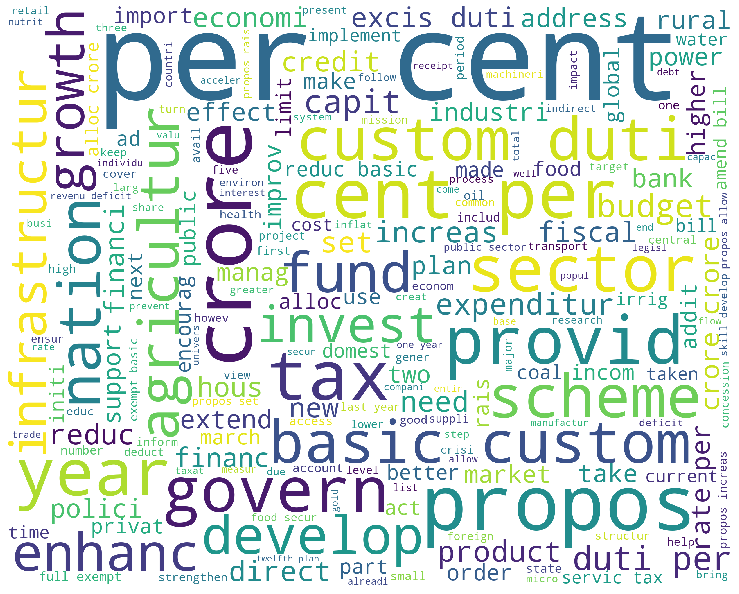

In [140]:
train_pos = rawData_final_new[2]

def wordcloud_draw(train_pos, color = 'black'):
    words = ' '.join(train_pos)
    
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(words)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
wordcloud_draw(train_pos,'white')

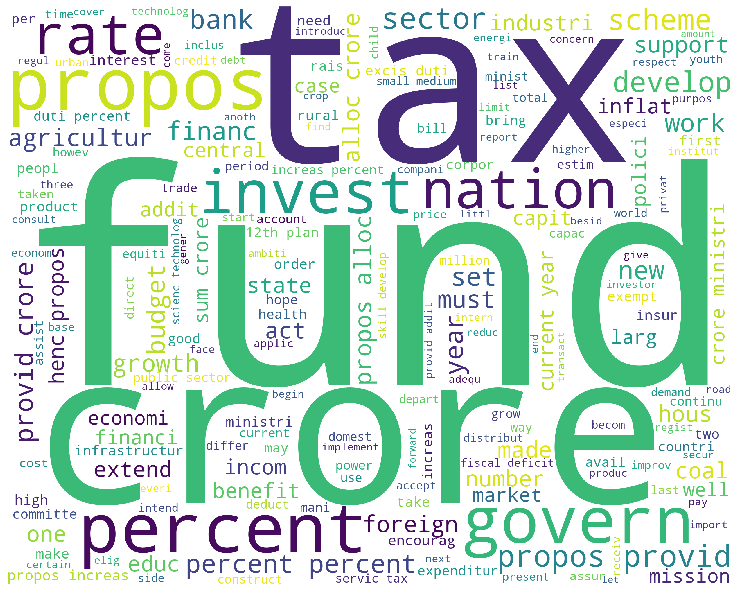

In [143]:
train_pos = rawData_final_new[3]

def wordcloud_draw(train_pos, color = 'black'):
    words = ' '.join(train_pos)
    
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(words)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
wordcloud_draw(train_pos,'white')

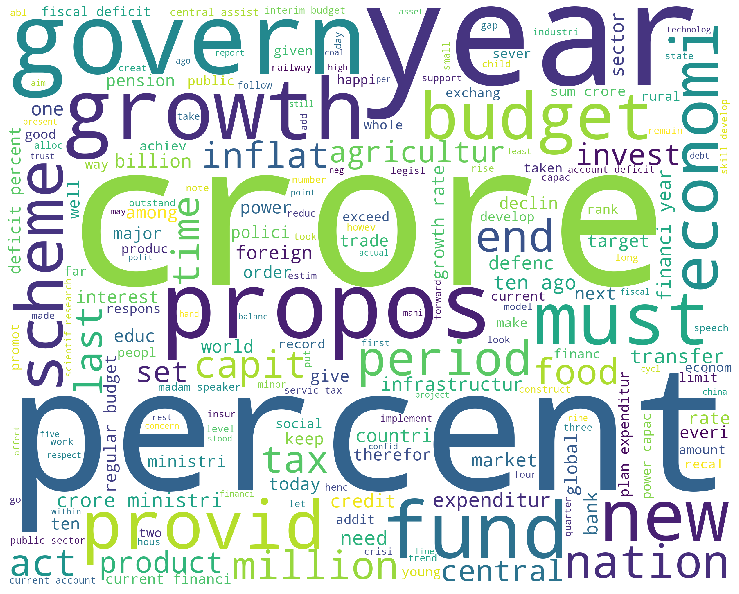

In [125]:
train_pos = rawData_final_new[4]

def wordcloud_draw(train_pos, color = 'black'):
    words = ' '.join(train_pos)
    
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(words)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
wordcloud_draw(train_pos,'white')

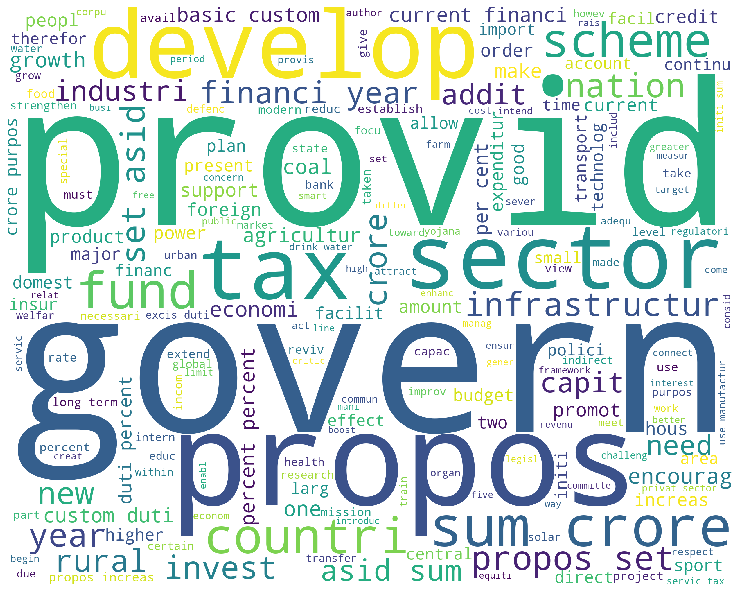

In [126]:
train_pos = rawData_final_new[5]

def wordcloud_draw(train_pos, color = 'black'):
    words = ' '.join(train_pos)
    
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(words)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
wordcloud_draw(train_pos,'white')

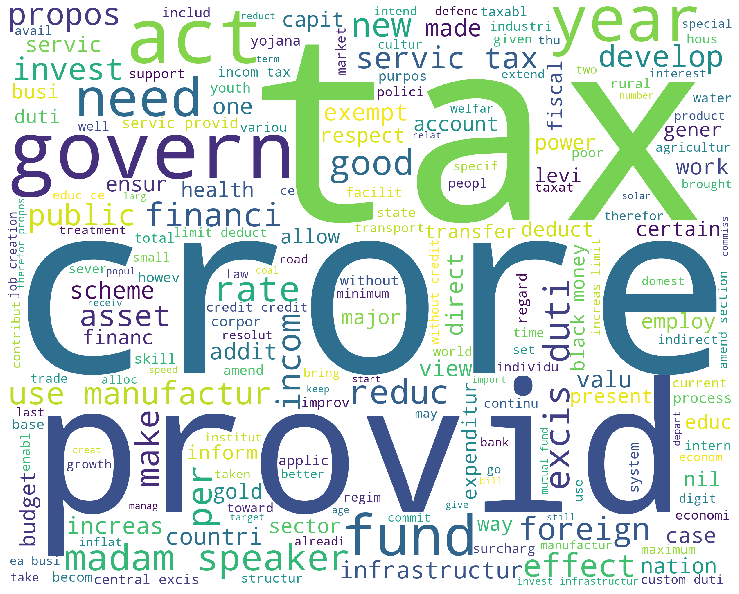

In [127]:
train_pos = rawData_final_new[6]

def wordcloud_draw(train_pos, color = 'black'):
    words = ' '.join(train_pos)
    
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(words)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
wordcloud_draw(train_pos,'white')

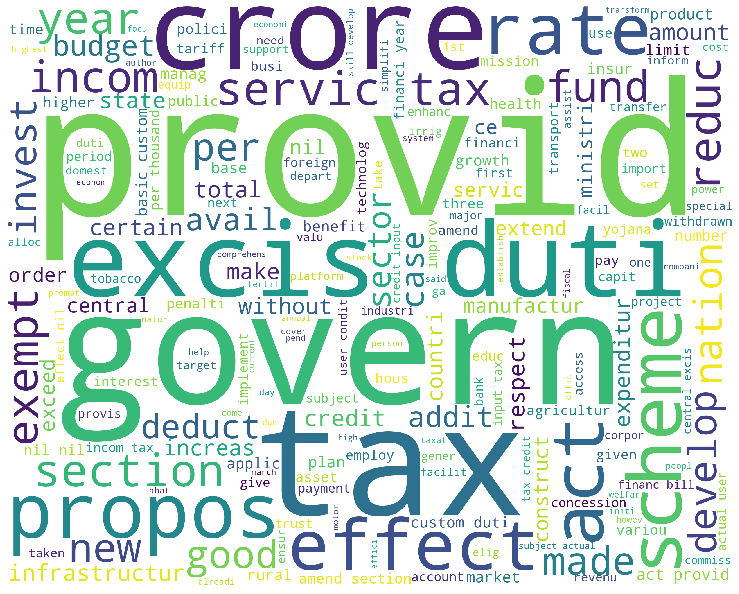

In [128]:
train_pos = rawData_final_new[7]

def wordcloud_draw(train_pos, color = 'black'):
    words = ' '.join(train_pos)
    
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(words)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
wordcloud_draw(train_pos,'white')

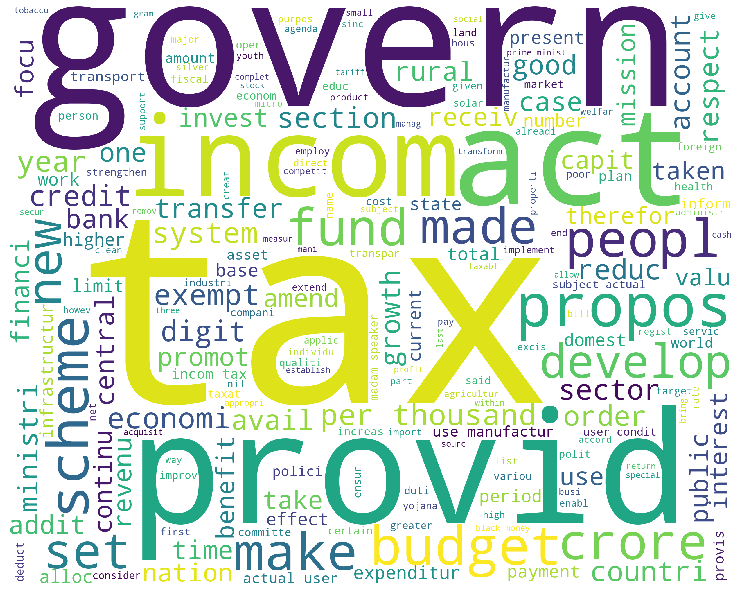

In [129]:
train_pos = rawData_final_new[8]

def wordcloud_draw(train_pos, color = 'black'):
    words = ' '.join(train_pos)
    
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(words)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
wordcloud_draw(train_pos,'white')

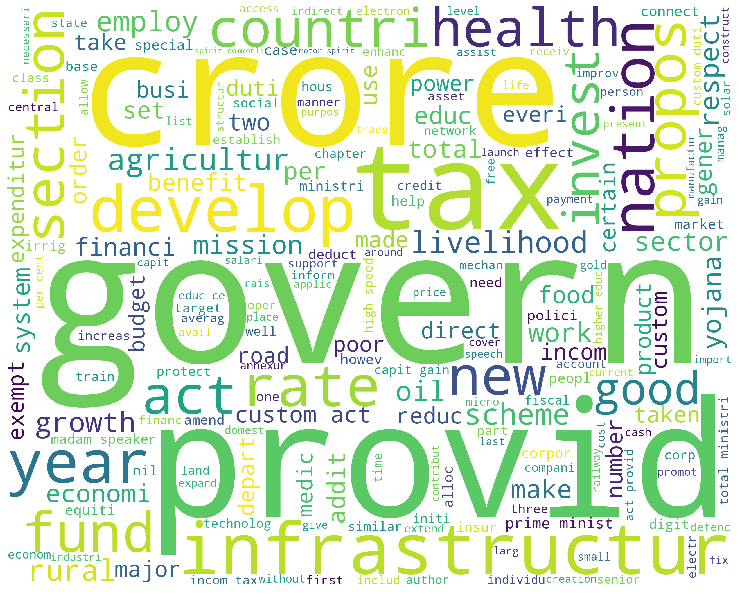

In [130]:
train_pos = rawData_final_new[9]

def wordcloud_draw(train_pos, color = 'black'):
    words = ' '.join(train_pos)
    
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(words)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
wordcloud_draw(train_pos,'white')

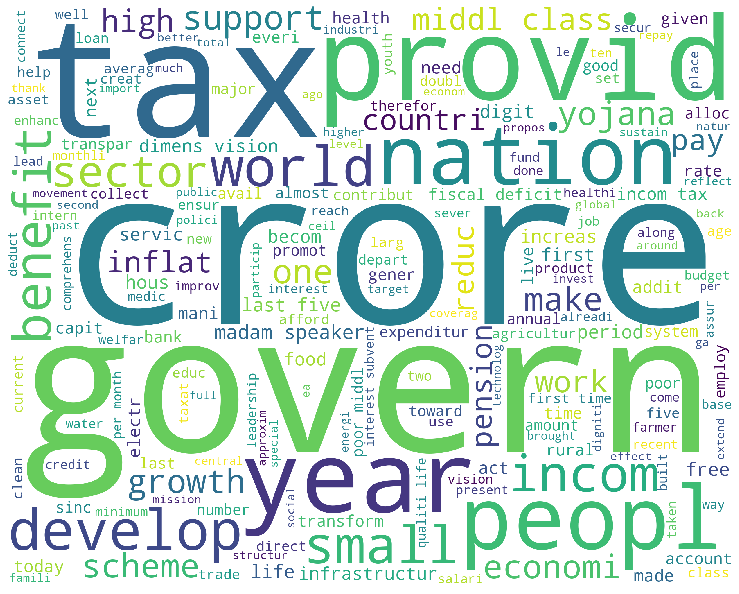

In [131]:
train_pos = rawData_final_new[10]

def wordcloud_draw(train_pos, color = 'black'):
    words = ' '.join(train_pos)
    
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(words)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
wordcloud_draw(train_pos,'white')

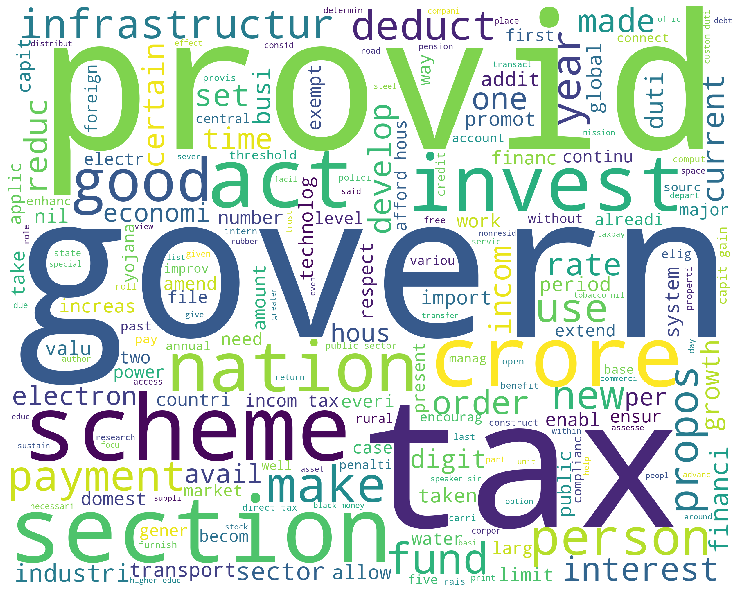

In [132]:
train_pos = rawData_final_new[11]

def wordcloud_draw(train_pos, color = 'black'):
    words = ' '.join(train_pos)
    
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(words)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
wordcloud_draw(train_pos,'white')

In [144]:
from nltk.probability import FreqDist
fdist = FreqDist(train_pos)
print(fdist)

<FreqDist with 1640 samples and 5552 outcomes>


In [146]:
fdist.most_common(10)

[('propos', 129),
 ('crore', 121),
 ('percent', 112),
 ('tax', 72),
 ('fund', 68),
 ('provid', 57),
 ('201314', 43),
 ('govern', 43),
 ('year', 40),
 ('sector', 38)]

In [149]:
train_pos

['present',
 'budget',
 'year',
 '201314',
 '2',
 'recal',
 'last',
 'tenur',
 'financ',
 'minist',
 'acknowledg',
 'gratitud',
 'splendid',
 'support',
 'receiv',
 'hous',
 'well',
 'peopl',
 'today',
 'ever',
 'seek',
 'support',
 'navig',
 'economi',
 'crisi',
 'whole',
 'world',
 'none',
 '3',
 'intend',
 'keep',
 'speech',
 'simpl',
 'straight',
 'forward',
 'reason',
 'short',
 '4',
 'shall',
 'begin',
 'set',
 'context',
 'global',
 'econom',
 'growth',
 '39',
 'percent',
 '2011',
 '32',
 'percent',
 '2012',
 'part',
 'global',
 'economi',
 'amount',
 '43',
 'percent',
 'extern',
 'sector',
 'risen',
 '108',
 'percent',
 'unaffect',
 'rest',
 'world',
 'economi',
 '201011',
 'current',
 'year',
 'growth',
 '5',
 'percent',
 'growth',
 '55',
 'percent',
 'whatev',
 'may',
 'final',
 'estim',
 'potenti',
 'growth',
 'rate',
 '8',
 'percent',
 'get',
 'back',
 'growth',
 'rate',
 'challeng',
 'countri',
 '5',
 'let',
 'say',
 'howev',
 'reason',
 'gloom',
 'pessim',
 'even',
 'larg